# Market Basket Analysis (Apriori)

## Introduction

Market basket analysis is an effective data science tool that enhances user experience and increases purchases, both of which provide businesses with immediate economic advantages.

When developing product combinations and marketing tactics in the past, marketers frequently relied on their gut feelings. Due to increase in the amount of customer data being stored ,Businesses now  use their findings to target customers and boost sales. Therefore, they put data scientists and analysts on marketing teams to help them with these decisions.


### What is Market Basket Analysis
Market Basket Analysis is a data mining technique which identifies relationships between products that are frequently purchased together. it can be used to understand Customer's buying patterns/behaviors and Customer's Preferences.It can be used to generate Product Recommendation to customers based on their purchase history, thereby encouraging them to make more purcahse in a single visit.

Although,Market Basket Analysis is widely used in the Retail Industry, it can also be use in Telecommunications and Financial Services to identify calling pattern and cross selling opportunities and identify patterns in credit card usage and investment behaviours respecytively.



## Why Apriori ?

The Apriori Algorithm is the most common technique for performing market basket analysis because of it's simplicity and scalability.It is easy to understand and implement and it can handle handle large Database effectively.It is also flexible and can adapt to different domain application.

## Import Libraries

In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

## Loading and Reading the Dataset

In [2]:
#Importing data
df=pd.read_csv('Market Basket Dataset.csv')

In [3]:
# This shows the first ten rows of the dataset
df.head(10)

,Member_number,Date,itemDescription
0,1808,7/21/2015,Tropical Fruit
1,2552,1/5/2015,Whole Milk
2,2300,9/19/2015,Pip Fruit
3,1187,12/12/2015,Other Vegetables
4,3037,2/1/2015,Whole Milk
5,4941,2/14/2015,Rolls/Buns
6,4501,5/8/2015,Other Vegetables
7,3803,12/23/2015,Pot Plants
8,2762,3/20/2015,Whole Milk
9,4119,2/12/2015,Tropical Fruit


In [4]:
# This shows the last 10 rows of the dataset
df.tail(10)

,Member_number,Date,itemDescription
38755,4586,9/26/2014,Bottled Water
38756,1987,10/29/2014,Fruit/Vegetable Juice
38757,4376,12/7/2014,Rolls/Buns
38758,2511,6/18/2014,Long Life Bakery Product
38759,3364,5/6/2014,Oil
38760,4471,10/8/2014,Sliced Cheese
38761,2022,2/23/2014,Candy
38762,1097,4/16/2014,Cake Bar
38763,1510,12/3/2014,Fruit/Vegetable Juice
38764,1521,12/26/2014,Cat Food


## Data Exploration  and Cleaning

In [5]:
# This displays general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
# This shows the statistical informaation of columns with integer data types in the dataset
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [7]:
# This tells us the number of rows and columns in the dataset
df.shape

(38765, 3)

In [8]:
# This is used to identify if any columns contain null values and as well sum up the null values in each row
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [9]:
# This counts elements of unique values in the itemDescription column in descending order to show the item that is bought most frequently and less frequently
df['itemDescription'].value_counts()

itemDescription
Whole Milk               2502
Other Vegetables         1898
Rolls/Buns               1716
Soda                     1514
Yogurt                   1334
                         ... 
Rubbing Alcohol             5
Bags                        4
Baby Cosmetics              3
Kitchen Utensil             1
Preservation Products       1
Name: count, Length: 167, dtype: int64

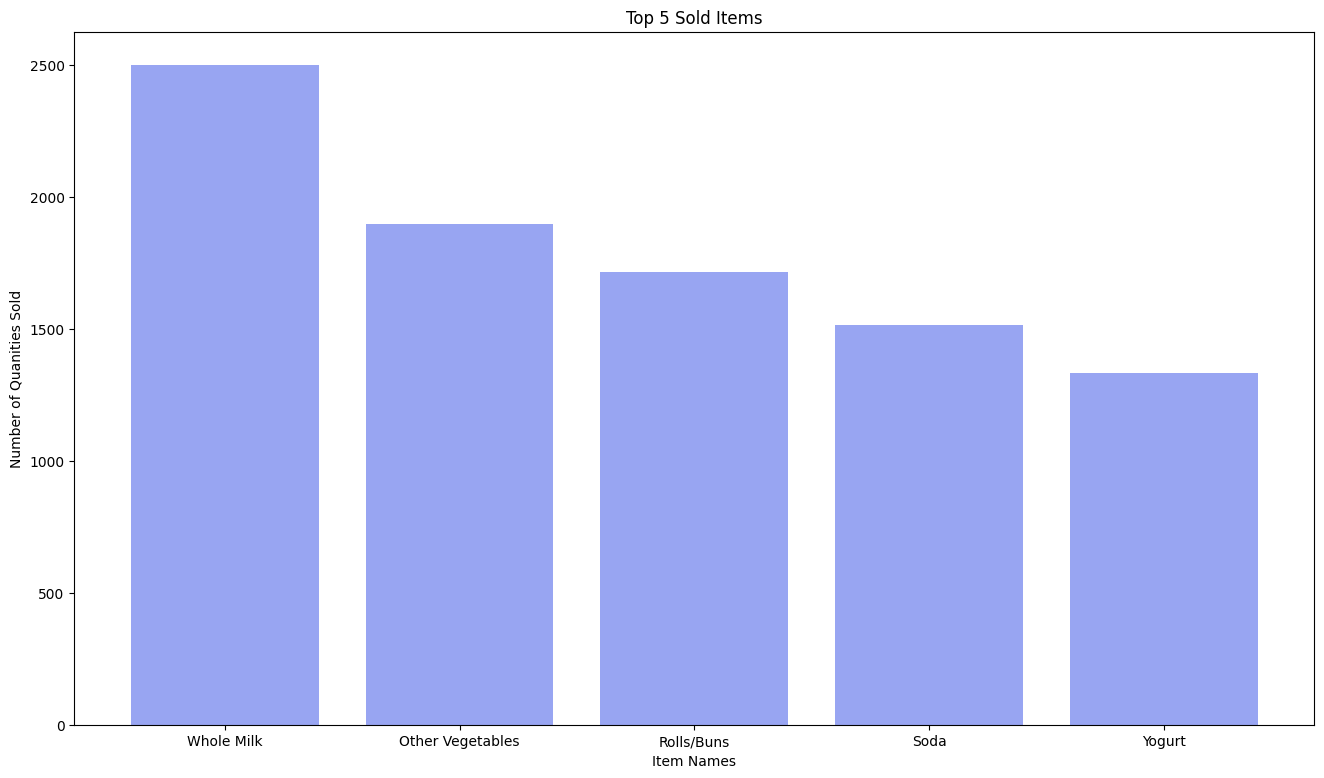

In [10]:
# A column chart showing the top 5 most purchased item. This shows that Whole Milk is the highest Sales,followed by other Vegetables and rolls/buns
Item_Distribution=df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending = False).head(5)
bars = Item_Distribution["itemDescription"]
height = Item_Distribution["Frequency"]
x_pos = np.arange(len(bars))
plt.figure(figsize=(16,9))
plt.bar(x_pos,height,color=(0.2,0.3,0.9,0.5))
plt.title("Top 5 Sold Items")
plt.xlabel("Item Names")
plt.ylabel("Number of Quanities Sold")
plt.xticks(x_pos,bars)
plt.show()

## Data Preparation for Market Basket Analysis

####  Feature Engineering : This is used Manipulate input data into optima lformat for analysis.This may include categorization, scaling, onehot encoding etc. 

In [11]:
#Firstly, In order to carry out Market Basket Analysis,I combined items that have the same Member_number and Date to form another column named Single Transaction 
#This shows a list of products purchased in the same transaction i.e items with one receipt.
 
df["Single_Transaction"]=df["Member_number"].astype(str)+ "_" +df["Date"].astype(str)
df.head()

,Member_number,Date,itemDescription,Single_Transaction
0,1808,7/21/2015,Tropical Fruit,1808_7/21/2015
1,2552,1/5/2015,Whole Milk,2552_1/5/2015
2,2300,9/19/2015,Pip Fruit,2300_9/19/2015
3,1187,12/12/2015,Other Vegetables,1187_12/12/2015
4,3037,2/1/2015,Whole Milk,3037_2/1/2015


In [12]:
#Secondly, pivoting this table to convert the items into columns and the transaction into rows in order to show how many times each item has been purchased in one transaction
df2= pd.crosstab(df['Single_Transaction'], df['itemDescription'])
df2.head(10)

itemDescription,Abrasive Cleaner,Artif. Sweetener,Baby Cosmetics,Bags,Baking Powder,Bathroom Cleaner,Beef,Berries,Beverages,Bottled Beer,...,Uht-Milk,Vinegar,Waffles,Whipped/Sour Cream,Whisky,White Bread,White Wine,Whole Milk,Yogurt,Zwieback
Single_Transaction,,,,,,,,,,,,,,,,,,,,,
1000_11/25/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_3/15/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_5/27/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_6/24/2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_7/24/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001_1/20/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1001_12/12/2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1001_2/7/2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1001_4/14/2015,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
# Next,the dataset will have items whose frequency is more than 1 and this may affect our result. Therefore, we need to normalize our result.
# To do this i ran this code. This will normalize the frquency of each column to 0 and 1
# If the frequency is greater than 0, the output will be 1, otherwise it returns 0.
# This means that even if there are multiples of the same item in the same transaction, the value will be encoded to 1 since market basket analysis does not take purchase frequency into consideration.

def normalize(item_freq):
    if item_freq > 0:
        result = 1
    else :
        result= 0
    return result
    
basket_input = df2.map(normalize)

#### Build the Apriori Algorithm for Market Basket Analysis

In [14]:
# This is use to discover frequently'bought together item' combinations:
frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")
rules.head(10)


C:\Users\USER\anaconda3\envs\Flit_Apprenticeship\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Beef),(Brown Bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012,0.174891
1,(Brown Bread),(Beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196,0.175559
2,(Butter),(Beef),0.035220,0.033950,0.001136,0.032258,0.950152,-5.960480e-05,0.998251,-0.051573
3,(Beef),(Butter),0.033950,0.035220,0.001136,0.033465,0.950152,-5.960480e-05,0.998184,-0.051509
4,(Citrus Fruit),(Beef),0.053131,0.033950,0.001804,0.033962,1.000349,6.297697e-07,1.000012,0.000369
5,(Beef),(Citrus Fruit),0.033950,0.053131,0.001804,0.053150,1.000349,6.297697e-07,1.000020,0.000361
6,(Beef),(Curd),0.033950,0.033683,0.001270,0.037402,1.110396,1.262443e-04,1.003863,0.102915
7,(Curd),(Beef),0.033683,0.033950,0.001270,0.037698,1.110396,1.262443e-04,1.003895,0.102886
8,(Domestic Eggs),(Beef),0.037091,0.033950,0.001136,0.030631,0.902217,-1.231356e-04,0.996575,-0.101169
9,(Beef),(Domestic Eggs),0.033950,0.037091,0.001136,0.033465,0.902217,-1.231356e-04,0.996247,-0.100873


#### Sorting the result by support, confidence, and lift to obtain the most common item combinations in the dataset.

In [15]:
# The  first 10 rows after sorting by Support, Confidence and Lift.
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
619,(Rolls/Buns),(Whole Milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
618,(Whole Milk),(Rolls/Buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
695,(Yogurt),(Whole Milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
694,(Whole Milk),(Yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
545,(Soda),(Other Vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
544,(Other Vegetables),(Soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
647,(Sausage),(Whole Milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
646,(Whole Milk),(Sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
620,(Yogurt),(Rolls/Buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
621,(Rolls/Buns),(Yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562


## Explanation of Terms and Interpretation of Result



#### Antecedent : An item which is considered the starting point.
#### Consequent : These are items that are likely to be purchased together with the antecedent.
#### Support quantifies how frequently an association rule occurs in a transactions. It is used to determine if an association rule significantly affects the overall number of purchase. Also,support can be used to determine if it is worth pursuing an association.
#### Confidence measures how strong an association rule is. It is the likelihood of a person acquiring the consequent after purchasing the antecedent. It helps to ascertain if a product combination will occur or not. Moreover, by comparing different product combinations' confidences , one can decide which one to choose to achieve marketing plans.
#### Lift indicates how much likely an association rule increases sales against when the products are purchased independently.

#### The resulting table shows that the five most popular product combinations that are frequently bought together are:

Rolls/Buns and  Whole Milk

Yogurt and Whole Milk

Soda and Other Vegetables

Sausages and  Whole Milk

Yogurt   and Rolls/Buns

